# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

/tmp/ipykernel_746/4115523809.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna()
df.sample(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
937,2010_MAINE,MAINE,2010,187634.0,2721365.0,320917.0,1083913.0,1316535.0,2680693.0,1421800.0,...,13728.0,14358.0,15315.0,110863.0,60148.0,189077.0,NaN,NaN,NaN,NaN
689,2005_MONTANA,MONTANA,2005,146552.0,1293070.0,191687.0,578321.0,523062.0,1268328.0,721019.0,...,10527.0,12050.0,11095.0,86477.0,47562.0,145416.0,241.0,286.0,225.0,269.0
1499,1986_NEW_YORK,NEW_YORK,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178888.0,174025.0,171545.0,NaN,NaN,2607719.0,NaN,NaN,NaN,NaN
878,2009_HAWAII,HAWAII,2009,179478.0,2689758.0,392837.0,2205032.0,91889.0,2318671.0,1402305.0,...,14249.0,12967.0,10621.0,109861.0,52630.0,180196.0,236.0,274.0,211.0,255.0
423,2000_IOWA,IOWA,2000,497301.0,3822452.0,217060.0,1879158.0,1726234.0,3974813.0,1906755.0,...,36448.0,36458.0,36892.0,287877.0,155073.0,495080.0,231.0,NaN,NaN,NaN
1087,2013_KANSAS,KANSAS,2013,488590.0,5667223.0,420820.0,3193838.0,2052565.0,5621023.0,2969201.0,...,36435.0,36457.0,32989.0,294099.0,138847.0,496440.0,246.0,290.0,223.0,267.0
29,1992_NEW_HAMPSHIRE,NEW_HAMPSHIRE,1992,NaN,1063391.0,31020.0,86296.0,946075.0,1066647.0,581123.0,...,15611.0,13537.0,10752.0,NaN,NaN,181247.0,230.0,278.0,228.0,NaN
1101,2013_NEW_JERSEY,NEW_JERSEY,2013,1338657.0,28070096.0,1145079.0,10986132.0,15938885.0,28179900.0,15489942.0,...,98832.0,99950.0,95646.0,792008.0,399391.0,1370295.0,247.0,296.0,229.0,276.0
1038,2012_LOUISIANA,LOUISIANA,2012,665478.0,8477993.0,1527734.0,3588546.0,3361713.0,8504567.0,4365583.0,...,57434.0,52507.0,40179.0,436675.0,186111.0,710903.0,NaN,NaN,NaN,NaN
513,2002_ARKANSAS,ARKANSAS,2002,449161.0,3147921.0,331069.0,2334551.0,482301.0,3087453.0,1697645.0,...,33835.0,36102.0,29277.0,280571.0,131716.0,450985.0,NaN,NaN,213.0,260.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [4]:
print(df['YEAR'].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
df_states = df.set_index('STATE')
print('Michigan:', (df_states.loc['MICHIGAN']['AVG_MATH_8_SCORE'].mean()))
print('Ohio:', (df_states.loc['OHIO']['AVG_MATH_8_SCORE'].mean()))
print('Ohio has the higher Grade 8 average Math score')

Michigan: 276.1666666666667
Ohio: 282.25
Ohio has the higher Grade 8 average Math score


Find the average for your chosen test across all states in 2019

In [6]:
df_years = df.set_index('YEAR')
print('Nationwide average Grade 8 Math score in 2019: ', df_years.loc[2019]['AVG_MATH_8_SCORE'].mean())

Nationwide average Grade 8 Math score in 2019:  281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: Made two new columns, one for state's support services expenditure per student and one for state's instruction expenditure per student.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Expenditure on Support Services per Student in relation to Grade 8 Math Scores')

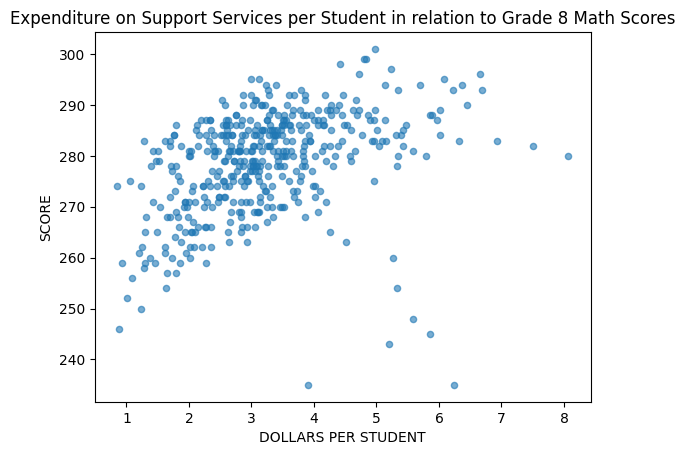

In [9]:
df.dropna(subset=['AVG_MATH_8_SCORE', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_PER_STUDENT'], inplace=True)
df.plot.scatter(x = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y = 'AVG_MATH_8_SCORE', alpha = 0.6)
plt.ylabel('SCORE')
plt.xlabel('DOLLARS PER STUDENT')
plt.title('Expenditure on Support Services per Student in relation to Grade 8 Math Scores')

This is a scatter plot that shows the relationship between a state's expenditure on support services per student and the average Grade 8 Math Scores. Ignoring all the outliers, it would seem that the scatter plot generally trends in a positive slope, showing that as states spend more per student on support services, the average Grade 8 Math score increases.
There are some outliers that would seem to show that more money spent means higher averages, but those are just outliers. There of course are also outliers that show the antithesis to that. 
This also shows that the average spend on support services per student is around 2-4 dollars.

**Visualization 2**

Text(0.5, 1.0, 'Expenditure on Instruction per Student in relation to Grade 8 Math Scores')

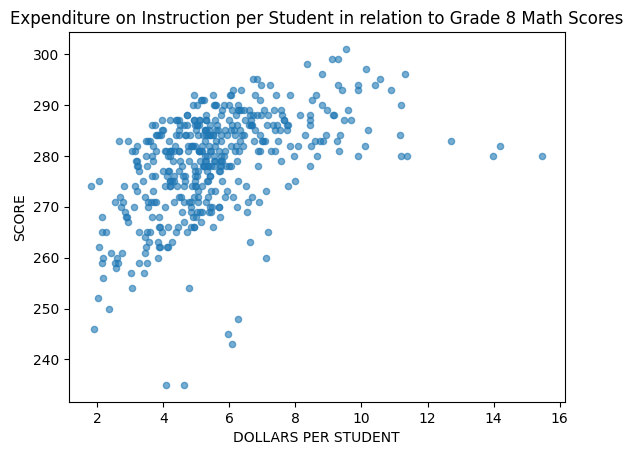

In [10]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.ylabel('SCORE')
plt.xlabel('DOLLARS PER STUDENT')
plt.title('Expenditure on Instruction per Student in relation to Grade 8 Math Scores')

This is a scatter plot that shows the relationship between a state's expenditure on Instruction and the average Grade 8 Math scores. 
Ignoring all the outliers, it would seem that the scatter plot generally trends in a positive slope, showing that as states spend more per student on Instruction, the average Grade 8 Math score increases (Compared to visualization 1, it would seem that this supposed positive slope is more evident and there are less outliers to stray us from claiming a positive slope).
Those that have spent around 10 or more dollars per student on Instruction seem to have an average Grade 8 Math score of 280 or greater.
This also shows that the average spent on Instruction per student is around 4-8 dollars (Note that in relation to the first visualization, this is around double the amount spent per student on support services).

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
# X is the input data
X = df[['ENROLL_8', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
# y is what I chose to look at, which is math 8 scores
y = df.loc[X.index]['AVG_MATH_8_SCORE'] 

In [20]:
# make sure no NaN in y
# fill NaN with median of y
# prefer median to mean since due to right skewed, mean overestimates
y.fillna(y.median(), inplace=True)

In [22]:
# using 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [23]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [24]:
# create your model here
model = LinearRegression() 

In [25]:
# fit essentially means train
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [28]:
# R^2 value
model.score(X_test, y_test)

0.2045840252195924

In [30]:
# mean error
np.mean(model.predict(X_test)-y_test)

2.219449033953037

In [31]:
# root mean squared error
np.mean((model.predict(X_test)-y_test)**2)**0.5

9.80032822430651

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

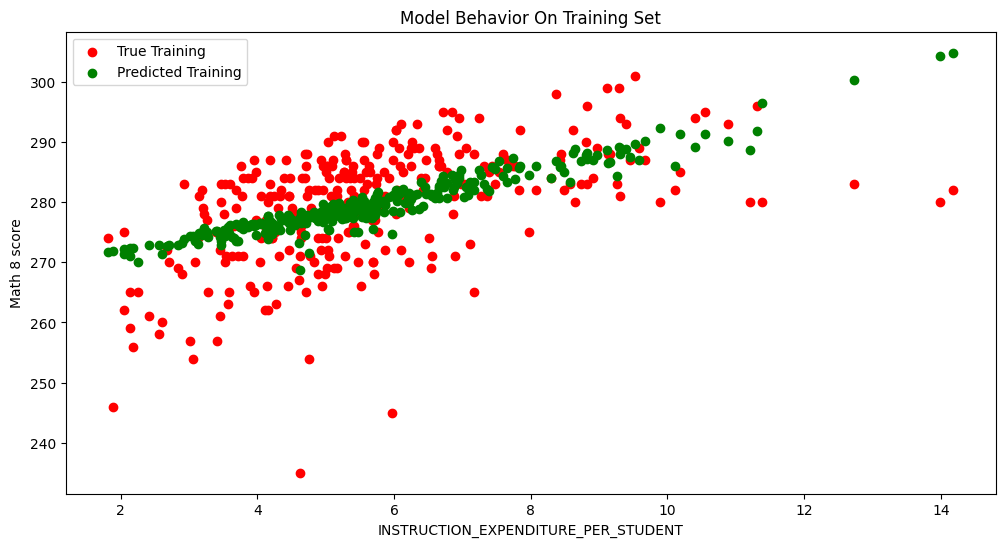

In [32]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

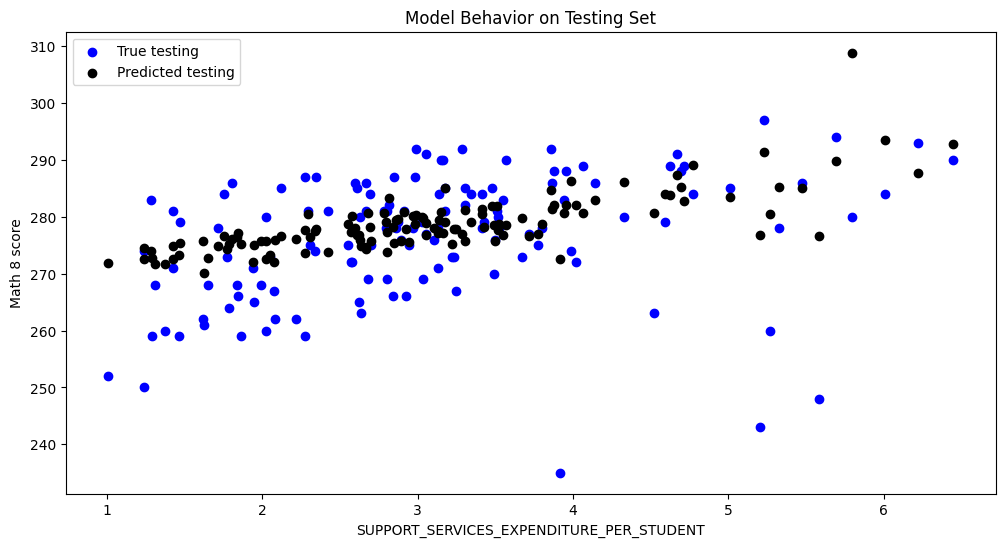

In [35]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

It was said in the tutorial that sometimes models can work *too* well and will do poorly. I think that perhaps this was the case for both of my models since the data sets I was using have many outliers in of themselves and there is not a very obvious pattern. However, there is a general positive trend in both models and both are slightly skewed to the right, our trained models both showcase this as well. Something that I could change to improve the output of my models is to modify the data set so that it bins the extreme outliers and even the general outliers. If I could make a conclusion from these models and the data sets themselves, I would say that Instruction expenditure per student and Support Services expenditure per student are both not the best data set to train off of. However, it does show that there is still at least some correlation between how much states spend on the respective expenditures, whether it be Support Services or Instruction, and the states average grade 8 Math scores. Of course, it is not possible to completely predict and even model Math 8 scores solely off of expenditure since expenditure itself depends greatly on many other variables.

Overall, both of my models accurately spotted the general positive trend that both data sets had and plotted such accordingly.